In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
uber_df=pd.read_csv("./data/uber.csv")

In [4]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
uber_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
uber_df = uber_df[:-1]

In [7]:
import datetime
def convert_time(column_name):
    y=[]
    for x in uber_df[column_name]:
        y.append(datetime.datetime.strptime(x, "%m/%d/%Y %H:%M"))

    uber_df[column_name] = y

In [8]:
column_date=uber_df[['START_DATE*','END_DATE*']] 
for x in column_date:
    convert_time(x)

In [9]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


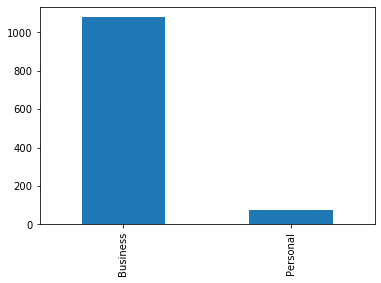

In [10]:
# plot number of trip at each category
x = uber_df['CATEGORY*'].value_counts().plot(kind='bar')

In [11]:
#extract month from start date
count = 0
month=[]
while count < len(uber_df):
    month.append(uber_df['START_DATE*'][count].month)
    count = count+1
uber_df['Month'] = month

In [12]:
# calculate duration of each trip in minutes
minutes=[]
uber_df['Duration_Minutes'] = uber_df['END_DATE*'] - uber_df['START_DATE*']
uber_df['Duration_Minutes']
for x in uber_df['Duration_Minutes']:
    minutes.append(x.seconds / 60)

uber_df['Duration_Minutes'] = minutes

Text(0.5, 1.0, 'Number of trips per hour')

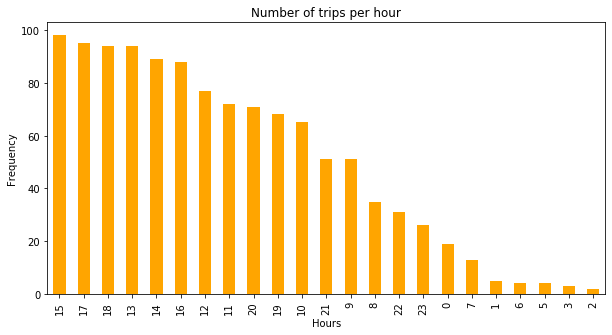

In [14]:
hours = uber_df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='orange',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips per hour')

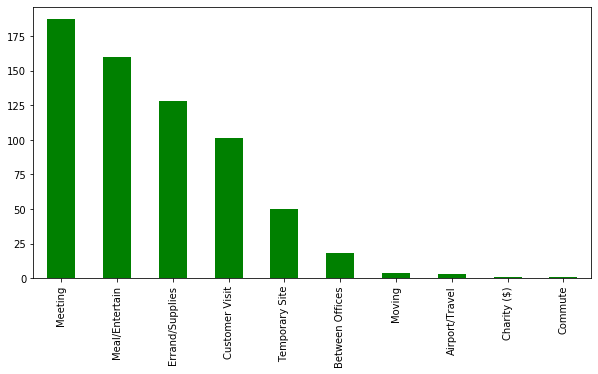

In [15]:
purpose_time = uber_df['PURPOSE*'].value_counts()
purpose_time.plot(kind='bar',figsize=(10,5),color='green') 

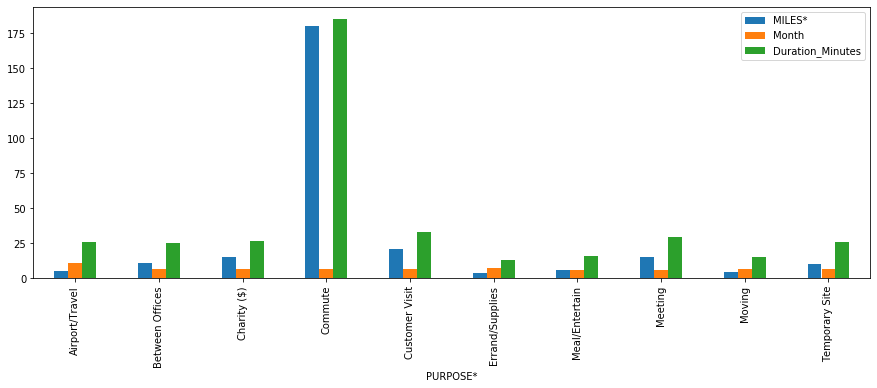

In [16]:
purpose = uber_df.groupby('PURPOSE*').mean()
purpose.plot(kind = 'bar',figsize=(15,5))

In [17]:
uber_df['Duration_hours'] = uber_df['Duration_Minutes'] / 60
uber_df['Speed_KM'] = (uber_df['MILES*']*1.6024) / uber_df['Duration_hours']
uber_df['Speed_KM']

0       81.722400
1       40.060000
2       35.499323
3       32.276914
4       91.408549
          ...    
1150     9.614400
1151    20.831200
1152    44.500937
1153    34.184533
1154    44.991658
Name: Speed_KM, Length: 1155, dtype: float64

In [18]:
uber_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,Month,Duration_Minutes,Duration_hours,Speed_KM
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,1,6.0,0.100000,81.722400
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,1,12.0,0.200000,40.060000
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,1,13.0,0.216667,35.499323
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,14.0,0.233333,32.276914
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,1,67.0,1.116667,91.408549


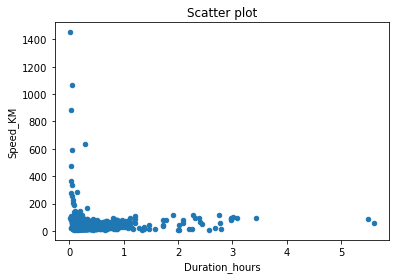

In [20]:
df = pd.DataFrame(data = uber_df, columns = ['Duration_hours', 'Speed_KM'])
df.plot.scatter(x='Duration_hours', y='Speed_KM', title= "Scatter plot");

plt.show(block=True);